### **Business Questions**

- What was the best month for sales? How much was earned that month?
- What city sold the most product?
- What time should we display advertisemens to maximize the likelihood of customer’s buying product?
- What products are most often sold together?
- What product sold the most? Why do you think it sold the most?

In [1]:
import pandas as pd

In [2]:
all_data = pd.read_csv("https://raw.githubusercontent.com/KeithGalli/Pandas-Data-Science-Tasks/master/SalesAnalysis/Output/all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## **Cleaning Data**

In [3]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

all_data = all_data.dropna(how = 'all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [4]:
## finding 'Or'

temp_df = all_data[all_data['Order Date'].str[0:2] == 'Or']
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [5]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']

In [6]:
all_data['Quantity Ordered']= pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [7]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

#all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


## **Question 1**

In [8]:
all_data['Sales'] = all_data['Quantity Ordered']*all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [9]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int32
Sales               float64
dtype: object

In [10]:
monthlySales = all_data.groupby(['Month']).sum()
monthlySales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


In [11]:
monthlySales.sort_values('Sales', ascending = False)

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


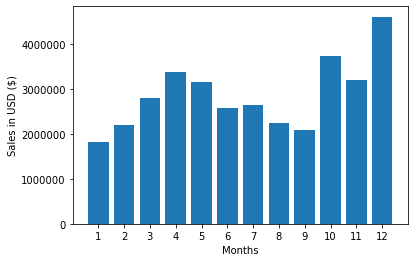

In [12]:
import matplotlib.pyplot as plt

months = range(1,13)

plt.bar(months, monthlySales['Sales'])

plt.xticks(months)

plt.xlabel("Months")
plt.ylabel("Sales in USD ($)")

plt.show()

**December was the best month for sales, The sale was 4613443.34 USD**

## **Question 2** 

In [13]:
# neeed a city column

city2 = all_data["Purchase Address"].apply(lambda x: x.split(","))
city = city2.apply(lambda x: " ".join(x[1].split()[0:]))
state = city2.apply(lambda x: x[2].split()[0])


result = pd.DataFrame(zip(city, state), columns=["City1", "State"])
result['City'] = result['City1'] + ' (' + result['State'] + ')' 

all_data['City'] = result['City']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Los Angeles (CA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,San Francisco (CA)


In [14]:
CitySales = all_data.groupby(['City']).sum()
CitySales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16537,2690417.19,104186,2704927.44
Austin (TX),11008,1817797.26,69418,1827918.13
Boston (MA),22251,3624834.89,140103,3648334.91
Dallas (TX),16616,2671374.82,104091,2688844.55
Los Angeles (CA),33256,5515767.76,207115,5549789.54
New York City (NY),27847,4541563.25,174860,4568833.76
Portland (ME),2724,454138.40,17039,455898.39
Portland (OR),11205,1847204.62,70133,1859697.46
San Francisco (CA),50138,8282472.55,313398,8330815.82


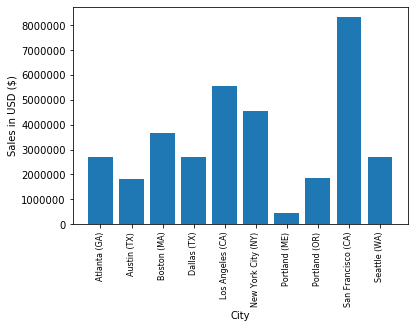

In [15]:
xlab = [city for city, df in all_data.groupby(['City'])]


plt.bar(xlab, CitySales['Sales'])

plt.ylabel('Sales in USD ($)')
plt.xlabel('City')

plt.xticks(xlab, rotation='vertical', size=8)

plt.show()

**San Francisco had the most sales** 

## **Question 3**

In [39]:
all_data['Hour'] =  pd.to_datetime(all_data['Order Date']).dt.hour
all_data['Minute'] = pd.to_datetime(all_data['Order Date']).dt.minute

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX),8,46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Los Angeles (CA),22,30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA),14,38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA),14,38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,San Francisco (CA),9,27


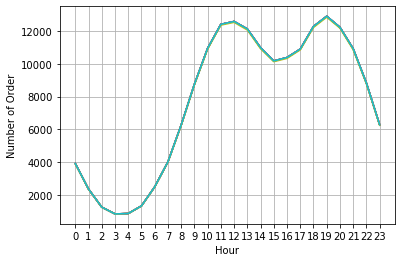

In [37]:
key = [hour for hour,df in all_data.groupby(['Hour'])]

plt.plot(key, all_data.groupby(['Hour']).count())

plt.xticks(key)
plt.grid()

plt.xlabel('Hour')
plt.ylabel('Number of Order')

plt.show()

**We can see that the top peaks is around 11 in the morning and 19 at evening. So showing ads before 11 and 19 will maximize sales.**

## **Question 4**

## (•ิ_•ิ)?

## **Question 5**

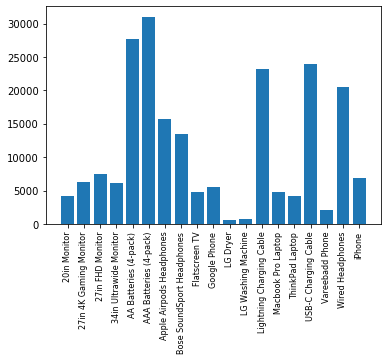

In [47]:
product_group = all_data.groupby(['Product']).sum()['Quantity Ordered']


product = [product for product,df in all_data.groupby(['Product'])]

plt.bar(product, product_group)

plt.xticks(product, rotation = 'vertical', size=8)

plt.show()

**AAA Batteries where the most sold product**

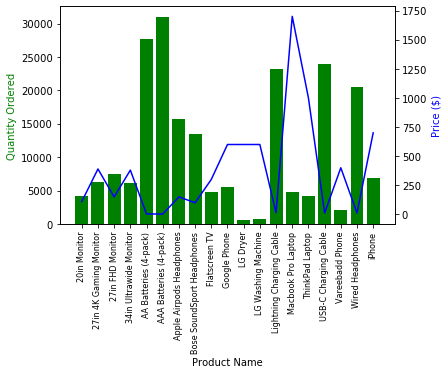

In [56]:
price = all_data.groupby(['Product']).mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product, product_group, color='g')
ax2.plot(product, price, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')

ax1.set_xticklabels(product, rotation='vertical', size=8)

plt.show()

**There is a correlation between the price and Order quantity. Cheap products have a high order rate.** 